In [1]:
%load_ext lab_black

In [2]:
from itertools import product

import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

# cp.installed_solvers()

## Question 1: Numerical perturbation analysis example

$$
\begin{array}{ll}\mbox{minimize} & x_1^2 + 2x_2^2 -x_1 x_2 - x_1\\ \mbox{subject to} &  x_1 + 2 x_2 \leq u_1 \\ &  x_1 - 4x_2 \leq u_2, \\&  x_1+ x_2 \geq -5, \end{array}
$$

(a) Solve this QP, for parameter values  $u_1=−2,  u_2=−3$ , to find optimal primal variable values  $x^\star_1$ and $x^\star_2$, and optimal dual variable values  $\lambda^\star_1,  \lambda^\star_2$  and $ \lambda^\star_3$. Let  $p^\star$  denote the optimal objective value. Verify that the KKT conditions hold for the optimal primal and dual variables you found (within reasonable numerical accuracy).

Hint: See  § 4.7 of the CVX users' guide to find out how to retrieve optimal dual variables. To specify the quadratic objective, use quad_form().

In [3]:
x = cp.Variable(2)
u = cp.Parameter(2)
u.value = np.array([-2, -3])
x1, x2 = x
u1, u2 = u

P = np.matrix([[1, -0.5], [-0.5, 2]])

constraints = [x1 + 2 * x2 <= u1, x1 - 4 * x2 <= u2, x1 + x2 >= -5]

In [4]:
obj = cp.Minimize(cp.quad_form(x, P) - x1)
prob = cp.Problem(obj, constraints)
p_star_exact = prob.solve(solver=cp.ECOS, verbose=True)
p_star_exact


ECOS 2.0.7 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  +3.402e+00  +4.712e-01  +2e+01  3e-01  1e-01  1e+00  5e+00    ---    ---    1  1  - |  -  - 
 1  +4.341e+00  +4.370e+00  +4e+00  6e-02  2e-02  7e-01  1e+00  0.8991  1e-01   1  2  2 |  0  0
 2  +6.698e+00  +6.966e+00  +7e-01  2e-02  5e-03  5e-01  2e-01  0.8906  9e-02   2  2  2 |  0  0
 3  +7.391e+00  +7.786e+00  +4e-01  2e-02  3e-03  6e-01  9e-02  0.6714  2e-01   2  2  2 |  0  0
 4  +8.124e+00  +8.132e+00  +3e-02  2e-03  3e-04  2e-02  7e-03  0.9240  4e-03   2  1  2 |  0  0
 5  +8.221e+00  +8.221e+00  +2e-03  9e-05  2e-05  3e-04  5e-04  0.9579  2e-02   2  2  2 |  0  0
 6  +8.222e+00  +8.222e+00  +1e-04  5e-06  9e-07  2e-05  3e-05  0.9415  3e-04   2  1  1 |  0  0
 7  +8.222e+00  +8.222e+00  +7e-06  3e-07  5e-08  6e-06  2e-06  0.9890  5e-02   2  1  1 |  0  0
 8  +8.222e+00  +8.222e+00  +7e-08  3e-09  6e-

8.222222072969965

What is $x^\star_2$? Enter your result rounded to two decimal places.

In [5]:
round(x2.value, 2)

0.17

In [6]:
for c in constraints:
    print(c.name(), "Dual value:", c.dual_value)

var0[0] + 2.0 @ var0[1] <= param1[0] Dual value: 3.388883249964853
var0[0] + -4.0 @ var0[1] <= param1[1] Dual value: 2.4444405402094027
-5.0 <= var0[0] + var0[1] Dual value: 2.3029364231050273e-08


What is $\lambda^\star_3$? Enter your result rounded to two decimal places.

In [7]:
round(constraints[2].dual_value, 2)

0.0

(b) We will now solve some perturbed versions of the QP, with
$$
u_1 = -2 + \delta_1, \qquad u_2 = -3 + \delta_2,
$$

where $\delta_1$ and  $\delta_2$  each take values from  $\{−0.1,0,0.1\}$ . (There are a total of nine such combinations, including the original problem with  $\delta_1=\delta_2=0$.) For each combination of  $\delta_1$ and  $\delta_2$ , make a prediction  $p^\star_\mathrm{pred}$ pred of the optimal value of the perturbed QP, and compare it to  $p^\star_\mathrm{exact}$, the exact optimal value of the perturbed QP (obtained by solving the perturbed QP). Find the values that belong in the two righthand columns in a table with the form shown below. Check that the inequality $p^\star_\mathrm{pred} \leq p^\star_\mathrm{exact}$  holds.

$$
\begin{array}{|r||r|r|r|r|}\hline\mathrm{\#}&\delta_1 & \delta_2 & p^\star_\mathrm{pred} &  p^\star_\mathrm{exact}\\\hline1&0 & 0 & & \\2&0 & -0.1 &  & \\3&0 & 0.1 &  & \\\hline4&-0.1 & 0 & & \\5&-0.1 & -0.1 &  & \\6&-0.1 & 0.1 &  & \\\hline7&0.1 & 0 & & \\8&0.1 & -0.1 &  & \\9&0.1 & 0.1 &  & \\\hline\end{array}
$$

For which perturbations (other than number 1) is  $p^\star_\mathrm{exact} - p^\star_\mathrm{pred}$ the smallest?

In [8]:
def predict(p_star_exact, dual_values, perturbs):
    return p_star_exact - sum(d * p for d, p in zip(dual_values, perturbs))

In [9]:
deltas = [-0.1, 0, 0.1]
dual_values = [float(c.dual_value) for c in constraints[:2]]

In [10]:
u.value

array([-2, -3])

In [11]:
dual_values, p_star_exact

([3.388883249964853, 2.4444405402094027], 8.222222072969965)

In [12]:
p_star_preds = {}
p_star_exacts = {}
for delta1, delta2 in product(deltas, deltas):
    u.value = np.array([-2 + delta1, -3 + delta2])
    p_star_preds[delta1, delta2] = predict(p_star_exact, dual_values, (delta1, delta2))
    p_star_exacts[delta1, delta2] = prob.solve()
    assert (
        p_star_preds[delta1, delta2] <= p_star_exacts[delta1, delta2]
    ), f"Something went wrong with {delta1, delta2}"

In [13]:
table = {k: p_star_exacts[k] - v for k, v in p_star_preds.items()}
table

{(-0.1, -0.1): 0.010001103568162861,
 (-0.1, 0): 0.0038925163628817927,
 (-0.1, 0.1): 0.0022254082015091825,
 (0, -0.1): 0.002212352290355213,
 (0, 0): 3.016881493067558e-06,
 (0, 0.1): 0.0022247975628992833,
 (0.1, -0.1): 0.002211988952181443,
 (0.1, 0): 0.0038912951302849663,
 (0.1, 0.1): 0.010001964702078148}

In [14]:
min_key = min({k: v for k, v in table.items() if v > 1e-4}, key=table.get)
print(min_key, table[min_key])

(0.1, -0.1) 0.002211988952181443


In [15]:
[(i, k) for i, k in enumerate(sorted(table, key=table.get), start=1)]

[(1, (0, 0)),
 (2, (0.1, -0.1)),
 (3, (0, -0.1)),
 (4, (0, 0.1)),
 (5, (-0.1, 0.1)),
 (6, (0.1, 0)),
 (7, (-0.1, 0)),
 (8, (-0.1, -0.1)),
 (9, (0.1, 0.1))]

## Question 2: A simple example
Consider the optimization problem
$$
\begin{array}{ll} \mbox{minimize}   & x^2 + 1 \\\mbox{subject to} & (x-2)(x-4) \leq 0,\end{array}
$$

with variable $x\in\mathbf{R}$.

(a) Analysis of primal problem. What is the optimal value?

In [16]:
x = cp.Variable()
constraint = [x >= 2, x <= 4]
obj = cp.Minimize(1 + x ** 2)
prob = cp.Problem(obj, constraint)
prob.solve()

5.000000000000002

(b) Lagrangian and dual function. Plot the objective  $x^2+1$ versus $x$ . On the same plot, show the feasible set, optimal point and value, and plot the Lagrangian  $L(x,\lambda)$ versus $x$ for a few positive values of $\lambda$. Verify the lower bound property ($p^\star \geq \inf_x L(x,\lambda)$ for $\lambda \ge0$). Derive and sketch the Lagrange dual function $g$.

In [17]:
def L(x, λ):
    return (x ** 2) + 1 - λ * (x - 2) * (x - 4)


def g(λ):
    result = -9 * pow(λ, 2) / (1 + λ)
    result += 1 + 8 * λ
    return result

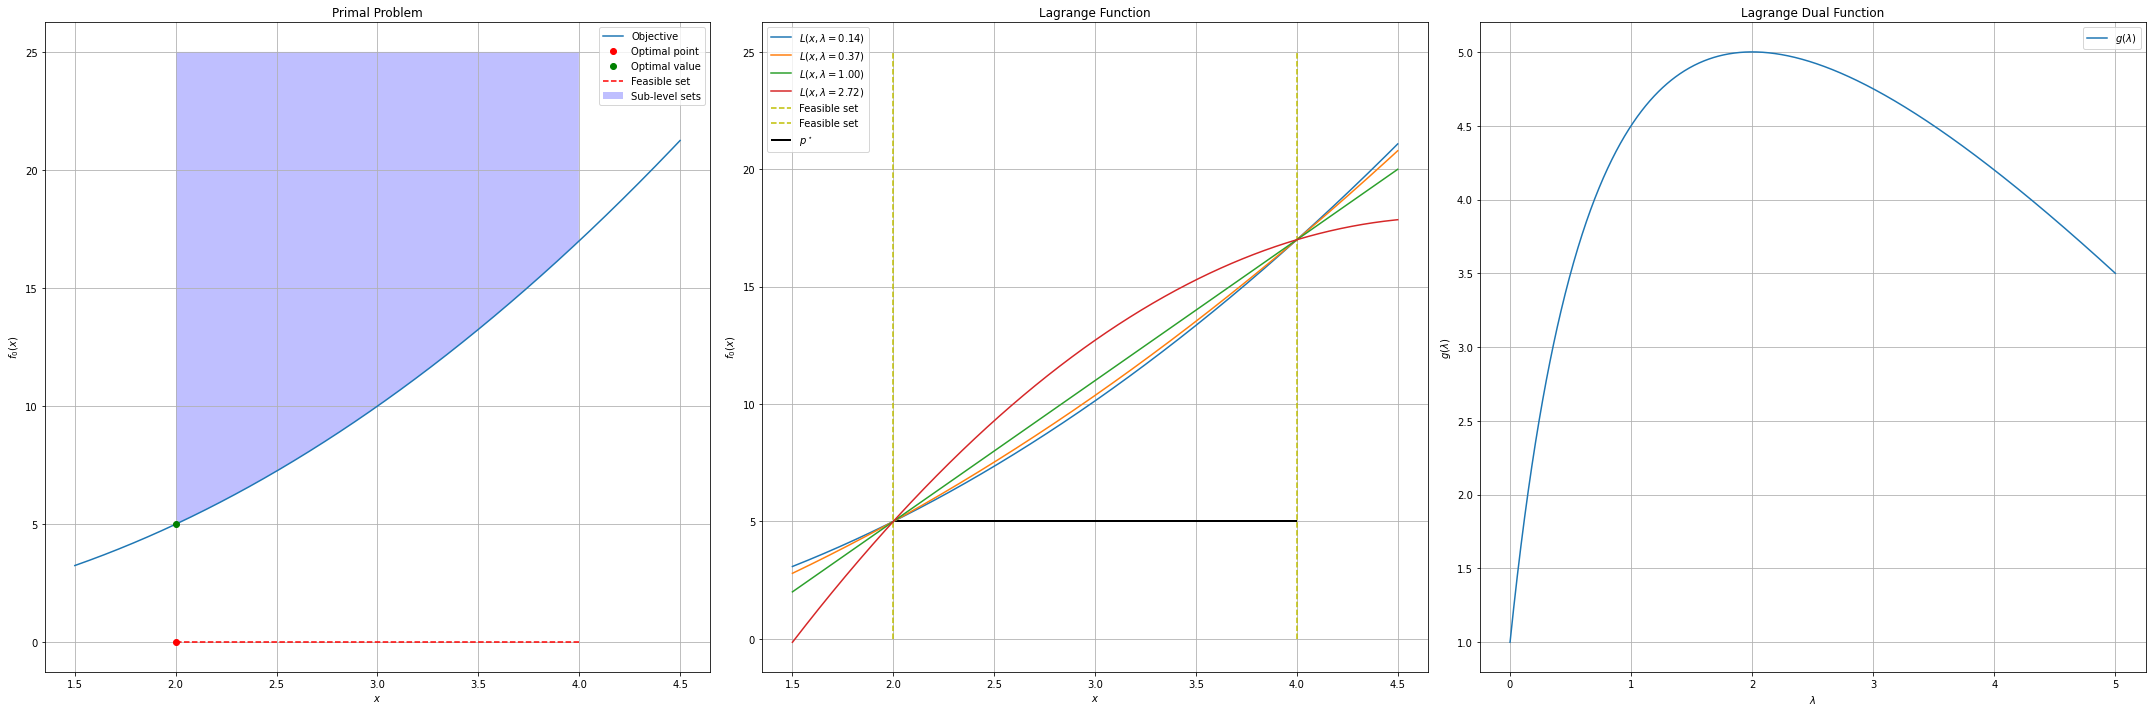

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(30, 10))

ax = axes[0]
x = np.linspace(1.5, 4.5, num=1000)
y = 1 + x ** 2
ax.plot(x, y, label="Objective")
ax.hlines(0, 2, 4, color="r", ls="--", label="Feasible set")
ax.plot(2, 0, "ro", label="Optimal point")
ax.plot(2, 5, "go", label="Optimal value")
ax.fill_between(
    x,
    y,
    y2=25,
    facecolor="b",
    where=(2 <= x) & (x <= 4),
    alpha=0.25,
    label="Sub-level sets",
)
ax.set_title("Primal Problem")
ax.set_xlabel("$x$")
ax.set_ylabel("$f_0(x)$")

ax = axes[1]
ax.vlines(2, 0, 25, color="y", ls="--", label="Feasible set")
ax.vlines(4, 0, 25, color="y", ls="--", label="Feasible set")
ax.hlines(5, 2, 4, color="k", lw=2, label="$p^\star$")
for λ in np.exp(np.arange(-2, 2, 1)):
    ax.plot(x, L(x, λ), label=f"$L(x,\lambda={λ:0.2f})$")
ax.set_title("Lagrange Function")
ax.set_xlabel("$x$")
ax.set_ylabel("$f_0(x)$")

ax = axes[2]
λ = np.linspace(0, 5, num=1000)
ax.plot(λ, g(λ), label="$g(\lambda)$")
ax.set_title("Lagrange Dual Function")
ax.set_xlabel("$\lambda$")
ax.set_ylabel("$g(\lambda)$")

for ax in axes:
    ax.grid()
    ax.legend()

fig.tight_layout()

## Question 3: Lagrangian relaxation of Boolean LP
A Boolean linear program is an optimization problem of the form
$$
\begin{array}{ll}\mbox{minimize} & c^T x \\\mbox{subject to} & Ax \preceq b \\& x_i \in \{0,1 \}, \quad i=1,\ldots,n,\end{array}
$$

and is, in general, very difficult to solve. In exercise 4.15 we studied the LP relaxation of this problem,

$$
\begin{array}{ll}\mbox{minimize} & c^T x \\ \mbox{subject to} & Ax \preceq b\\ & 0 \leq x_i \leq 1, \quad i=1,\ldots,n, \end{array}
$$

which is far easier to solve, and gives a lower bound on the optimal value of the Boolean LP. In this problem we derive another lower bound for the Boolean LP, and work out the relation between the two lower bounds.

(a) *Lagrangian relaxation*. The Boolean LP can be reformulated as the problem

$$
\begin{array}{ll}\mbox{minimize}   & c^T x \\\mbox{subject to} & Ax \preceq b \\ & x_i(1-x_i)=0, \quad i=1,\ldots,n,\end{array}
$$

which has quadratic equality constraints. The Lagrange dual of this problem is

$$
\begin{array}{ll}\mbox{maximize}  & \underline{\hspace{1.5cm}}  \\\mbox{subject to}  & \mu \succeq 0.\end{array}
$$

The correct equation that fills the blank spot is:
$$
-b^T \mu + \sum_{i=1}^n \min\{0,c_i+a_i^T\mu\}
$$

The optimal value of the dual problem (which is convex) gives a lower bound on the optimal value of the Boolean LP. This method of finding a lower bound on the optimal value is called Lagrangian relaxation.

(b) The lower bound obtained via Lagrangian relaxation, and via the LP relaxation are the same. The dual of the LP relaxation is
$$
\begin{array}{ll}\mbox{maximize} & \underline{\hspace{1.5cm}} \\\mbox{subject to} & A^T u - v+ w + c = 0 \\  & u\succeq 0, v\succeq 0, w\succeq 0.\end{array}
$$
The correct equation that fills the blank spot is

$$
- b^T u - \mathbf{1}^T w
$$

## Question 4: Option Price Bounds

In this problem we use the methods and results of Example 5.10 to give bounds on the arbitrage-free price of an option. (See Exercise 5.38 for a simple version of option pricing.) We will use all the notation and definitions from Example 5.10.

We consider here options on an underlying asset (such as a stock); these have a payoff or value that depends on $S$, the value of the underlying asset at the end of the investment period. We will assume that the underying asset can only take on $m$ different values, $S^{(1)},\ldots, S^{(m)}$. These correspond to the $m$  possible scenarios or outcomes described in Example 5.10.

A risk-free asset has value $r>1$ in every scenario.

A put option at strike price $K$ gives the owner the right to sell one unit of the underlying stock at price $K$. At the end of the investment period, if the stock is trading at a price  𝑆 , then the put option has payoff $(K-S)_+=\max\{0,K-S\}$ (since the option is exercised only if  𝐾>𝑆 ). Similarly a call option at strike price  𝐾  gives the buyer the right to buy a unit of stock at price  𝐾 . A call option has payoff $(S-K)_+=\max\{0,S-K\}$.

A collar is an option with payoff

$$
\begin{cases}
C-S_0 & S>C\\
S-S_0 & F \leq S \leq C\\
F-S_0 & S \le F
\end{cases}
$$

where  𝐹  is the floor,  𝐶  is the cap and  𝑆0  is the price of the underlying at the start of the investment period. This option limits both the upside and downside of payoff.

Now we consider a specific problem. The price of the risk-free asset, with  $r=1.05$, is 1 . The price of the underlying asset is  $S_0=1$ . We will use $m=200$  scenarios, with $S(i)$ uniformly spaced from $S(1)=0.5$ to $S(200)=2$. The following options are traded on an exchange, with prices listed below.


|Type|	Strike|	Price|
|-|-|-|
|Call	|1.1	|0.06|
|Call	|1.2	|0.03|
|Put	|0.8	|0.02|
|Put	|0.7	|0.01|

A collar with floor  $F=0.9$  and cap  $C=1.15$  is not traded on an exchange. Find the range of prices for this collar, consistent with the absence of arbitrage and the prices given above. Enter your results rounded to three decimal places.


In [19]:
n = 7
m = 200
S0 = 1
r0 = 1
r = 1.05
S = np.linspace(0.5, 2, 200)
C = 1.15
F = 0.9

In [20]:
# S, r, Call 1.1, Call 1.2, Put 0.8, Put 0.7, Collar 0.9 1.15
V = np.empty((m, n))
V[:] = np.nan

In [21]:
V[:, 0] = S
V[:, 1] = r
V[:, 2] = np.maximum(S - 1.1, 0)
V[:, 3] = np.maximum(S - 1.2, 0)
V[:, 4] = np.maximum(0.8 - S, 0)
V[:, 5] = np.maximum(0.7 - S, 0)
V[:, 6] = (C - S0) * (S > C) + (S - S0) * (F <= S) * (S <= C) + (F - S0) * (S <= F)

In [22]:
V.shape

(200, 7)

In [23]:
# V[:, 6]

In [24]:
y = cp.Variable(m)
pn = cp.Variable()
p = np.array([S0, r0, 0.06, 0.03, 0.02, 0.01])
constraints = [V[:, :-1].T @ y == p, V[:, -1].T @ y == pn, y >= 0]

In [25]:
obj = cp.Minimize(pn)
prob = cp.Problem(obj, constraints)
pn_lower = prob.solve()
pn_lower

0.032619047619008155

Lower bound =

In [26]:
round(pn_lower, 3)

0.033

In [27]:
obj = cp.Maximize(pn)
prob = cp.Problem(obj, constraints)
pn_upper = prob.solve()
pn_upper

0.06495039682537877

Upper bound =

In [28]:
round(pn_upper, 3)

0.065